In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import time
import openslide
import openslide_generator
import importlib
importlib.reload(openslide_generator)

<module 'openslide_generator' from 'c:\\Users\\arno\\Documents\\fourthbrain\\capstone\\repos\\keras-OpenSlideGenerator\\openslide_generator.py'>

## various fetching modes

In [3]:
gen_train = openslide_generator.OpenSlideGenerator(
        'C:/Users/arno/Documents/fourthbrain/capstone/data/labels/labels_train.txt', 
        'C:/Users/arno/Documents/fourthbrain/capstone/data/training/', 512, 256)

loaded 5 slide(s).
[0] center_1/patient_038_node_0.tif
- 2 regions
- 1270578851.6684685 px2
- patch scale: 512
- fetch probability (area mode): 0.076421725058859
[1] center_1/patient_038_node_1.tif
- 2 regions
- 4922005609.388678 px2
- patch scale: 512
- fetch probability (area mode): 0.3012671798861856
[2] center_1/patient_038_node_2.tif
- 11 regions
- 1808509137.469384 px2
- patch scale: 512
- fetch probability (area mode): 0.10820207174354116
[3] center_1/patient_038_node_3.tif
- 3 regions
- 7344859921.665641 px2
- patch scale: 512
- fetch probability (area mode): 0.44983313246295664
[4] center_1/patient_038_node_4.tif
- 4 regions
- 1101264861.114746 px2
- patch scale: 512
- fetch probability (area mode): 0.06427589084845738
there are total 22 regions.
patches per epoch is set to 62737.



In [4]:
gen_train.label_to_use = 0

gen_train.fetch_mode = 'area'
# gen_train.fetch_mode = 'slide'
# gen_train.fetch_mode = 'label'
# gen_train.fetch_mode = 'label-slide'

In [5]:
t_start = time.time()
positions = dict()
gen_train.reset_fetch_count()
for i in range(2000):
    if i % 500 == 0:
        print(i)
    _, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    if not slide_id in positions:
        positions[slide_id] = []
    positions[slide_id].append((posx, posy, label))
print(time.time() - t_start)

0
500
1000
1500
60.00678277015686


In [6]:
gen_train.fetch_count

[[81, 66],
 [302, 281],
 [0, 0, 0, 0, 0, 0, 0, 42, 69, 29, 67],
 [518, 229, 181],
 [29, 35, 29, 42]]

In [7]:
gen_train.total_loop_count

2012

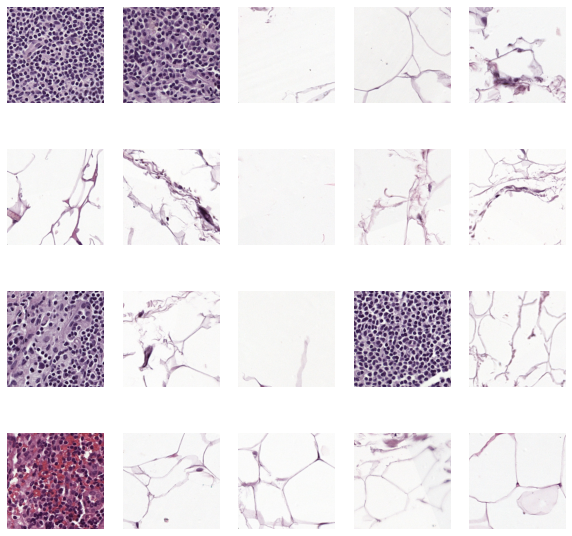

In [8]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))
    plt.axis('off')

In [12]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    #print(image)
    gen_train.colour_deconvolution(image)
    plt.subplot(4,5,i+1)
    #plt.imshow(ihc[0])
    plt.axis('off')

TypeError: 'bool' object is not callable

<Figure size 720x720 with 0 Axes>